In [39]:
!curl -L -o adult.data https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!curl -L -o adult.names https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3881k    0 3881k    0     0  4789k      0 --:--:-- --:--:-- --:--:-- 4785k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5229    0  5229    0     0  21154      0 --:--:-- --:--:-- --:--:-- 21170


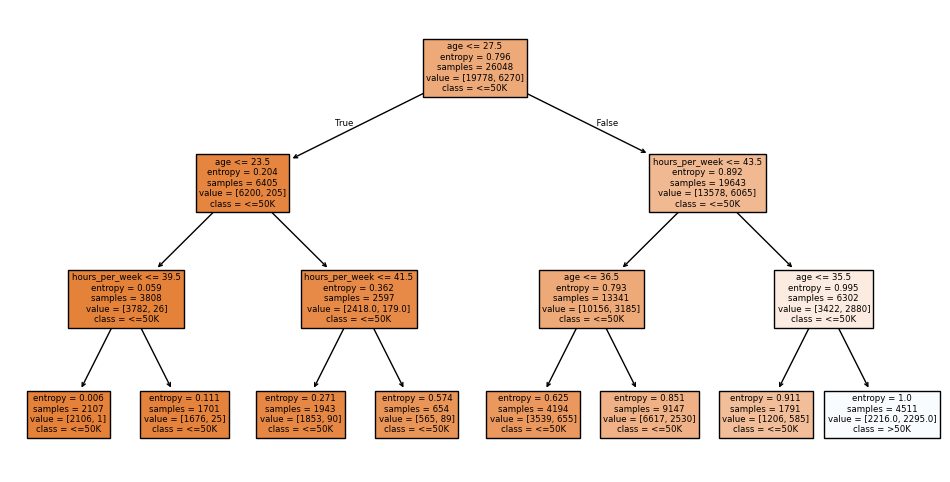

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define column names from UCI docs
columns = ["age","workclass","fnlwgt","education","education_num",
           "marital_status","occupation","relationship","race","sex",
           "capital_gain","capital_loss","hours_per_week","native_country","income"]

# Load dataset
df = pd.read_csv("adult.data", header=None, names=columns, na_values=" ?", skipinitialspace=True)

# Drop missing values
df = df.dropna()

# Keep only relevant columns (age, hours_per_week as proxy for income/work)
X = df[["age", "hours_per_week"]]
y = df["income"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()
